<a href="https://colab.research.google.com/github/celestialberry/Lawn-Tennis-Shot-Classifier/blob/main/LSTM%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import cv2
import os
import numpy as np
import math
import random
import tensorflow as tf
import datetime as dt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical ,plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping







In [ ]:
CLASS_NAME=["Backhand Serve","Fronthand Serve"]


In [ ]:
IMAGE_HEIGHT,IMAGE_WIDTH=64,64
SEQUENCE_LENGTH=9
DATASET_DIR="/content/drive/MyDrive/data"





def frame_extract(video_path):
  FRAME_LIST=[]
  video_reader=cv2.VideoCapture(video_path)
  video_frame_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
  skip_frames_window=max(int(video_frame_count/SEQUENCE_LENGTH),1)
  for frame_counter in range(SEQUENCE_LENGTH):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES,frame_counter*skip_frames_window)
    success,frame=video_reader.read()

    if not success:
        break
    resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
    normalise_frame=resized_frame/255
    FRAME_LIST.append(normalise_frame)
  video_reader.release()
  return FRAME_LIST
















In [ ]:
def create_dataset():
  features=[]
  labels=[]
  video_file_paths=[]



  for class_index, class_name in enumerate(CLASS_NAME):
    FILE_LIST=os.listdir(os.path.join(DATASET_DIR,class_name))

    for file_name in FILE_LIST:
      video_file_path=os.path.join(DATASET_DIR,class_name,file_name)
      print(video_file_path)
      frames=frame_extract(video_file_path)
      if len(frames) == SEQUENCE_LENGTH:
        features.append(frames)
        labels.append(class_index)
        video_file_paths.append(video_file_path)

  features=np.array(features)
  labels=np.array(labels)

  return features,labels,video_file_paths




In [ ]:
FEATURES,LABELS,VIDEO_FILE_PATHS= create_dataset()

/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (1).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (2).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (3).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (4).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (5).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (6).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (7).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (8).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (9).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (10).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (11).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (12).mp4
/content/drive/MyDrive/data/Backhand Serve/Shashwat_Backhand_Serve_ (13).mp4
/content

In [ ]:
one_hot_encoded_labels=to_categorical(LABELS)
X_train,X_test,y_train,y_test =train_test_split(FEATURES,one_hot_encoded_labels,test_size=0.25, shuffle=True,random_state=0)

In [ ]:
def create_model():
  model=Sequential()
  model.add(ConvLSTM2D(filters=4,kernel_size=(3,3),activation="tanh" ,data_format="channels_last",recurrent_dropout=0.2,return_sequences=True,input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding="same",data_format="channels_last"))
  model.add(TimeDistributed(Dropout(0.2)))
  model.add(ConvLSTM2D(filters=8,kernel_size=(3,3),activation="tanh" ,data_format="channels_last",recurrent_dropout=0.2,return_sequences=True))
  model.add(MaxPooling3D(pool_size=(1,2,2),padding="same",data_format="channels_last"))
  model.add(Flatten())
  model.add(Dense(len(CLASS_NAME),activation="softmax"))
  model.summary()
  return model


In [ ]:
MODEL=create_model()

In [ ]:
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
MODEL.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])





In [ ]:
 MODEL.fit(x=X_train,y=y_train,epochs=5,batch_size=20,shuffle=True,validation_split=0.2,callbacks=[early_stopping_callback])

Epoch 1/5
22/22 [==============================] - 51s 2s/step - loss: 0.2054 - accuracy: 0.9157 - val_loss: 0.2822 - val_accuracy: 0.8972
Epoch 2/5
22/22 [==============================] - 51s 2s/step - loss: 0.1124 - accuracy: 0.9602 - val_loss: 0.1034 - val_accuracy: 0.9439
Epoch 3/5
22/22 [==============================] - 51s 2s/step - loss: 0.0725 - accuracy: 0.9813 - val_loss: 0.1067 - val_accuracy: 0.9626
Epoch 4/5
22/22 [==============================] - 50s 2s/step - loss: 0.0767 - accuracy: 0.9696 - val_loss: 0.0578 - val_accuracy: 0.9813
Epoch 5/5
22/22 [==============================] - 51s 2s/step - loss: 0.0443 - accuracy: 0.9883 - val_loss: 0.0426 - val_accuracy: 0.9907


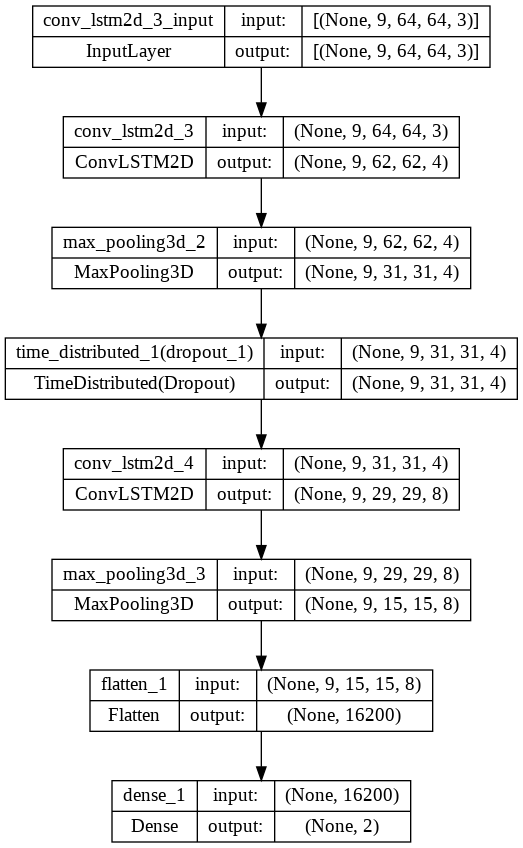

In [ ]:
plot_model(MODEL,to_file='MODEL_structure.png',show_shapes=True,show_layer_names=True)

6/6 [==============================] - 6s 1s/step


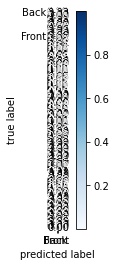

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix


RES=MODEL.predict(X_test)
import matplotlib.pyplot as plt
labs = ['Back ', 'Front ',]
fig, ax = plot_confusion_matrix(conf_mat=RES,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
ax.set_xticklabels([''] + labs)
ax.set_yticklabels([''] + labs)
plt.show()

NameError: ignored